In [1]:
import requests
import re
from textblob import TextBlob

In [13]:
response = requests.get('https://www.tripadvisor.com.mx/Hotel_Review-g662606-d283869-Reviews-or5-Jardines_de_Nivaria_Adrian_Hoteles-Costa_Adeje_Adeje_Tenerife_Canary_Islands.html')

In [14]:
htmlreviewtag = '<q class="IRsGHoPm"><span>' 
htmlreviewtagend = '</span></q>'
review = re.search(htmlreviewtag + '(.+?)' + htmlreviewtagend, response.text).group(1)
review

'Es el cuarto año que pasamos unos días de descanso en este maravilloso Hotel, donde te sientes como en casa. Destacar al personal del mismo que es lo mas valioso. Tanto el desayuno como la cena son perfectos en cantidad, calidad y servicio. Agradecer a Miguel, Alejandro, David, Giulio... su atención durante nuestros desayunos y cenas, sin olvidarme de Carmen Garcia siempre sonriendo y pendiente de que no falte de nada.  Gracias a Carmen por su atención en el servicio de toallas. Gracias Sonia (relaciones) por su amabilidad en todo momento. Se me olvidan personas que no puedo nombrar por desconocer sus nombres,  gracias a todos los que nos habéis atendido con tanta profesionalidad en todo momento.'

In [58]:
allReviews = []
i = 0
while( i < 312):
    URL = 'https://www.tripadvisor.com/Hotel_Review#par#-g45963-d111709-Reviews-Luxor_Hotel_Casino-Las_Vegas_Nevada.html'
    if i == 0:
        URL = URL.replace('#par#','')
    else:
        l = i * 5
        par = '-orass'+str(l)
        URL = URL.replace('#par#',par)
    response = requests.get(URL)
    initText = '<q class="IRsGHoPm"><span>' 
    endText = '</span></q>'
    try:
        review = re.search(htmlreviewtag + '(.+?)' + htmlreviewtagend, response.text).group(1)
        indexList = [(element.start(0), element.end(0)) for element in re.finditer(htmlreviewtag + '(.+?)' + htmlreviewtagend, response.text)] 
        completHtml = response.text
        for index in indexList:
            inf = index[0]
            sup = index[1]
            review = completHtml[inf + len(htmlreviewtag): sup -  len(htmlreviewtagend)]
            allReviews.append(review)
        print( str(i), end = '')
    except:
        pass
    i += 1
len(allReviews)

0123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132133134135136137138139140141142143144145146147148149150151152153154155156157158159160161162163164165166167168169170171172173174175176177178179180181182183184185186187188189190191192193194195196197198199200201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265266267268269270271272273274275276277278279280281282283284285286287288289290291292293294295296297298299300301302303304305306307308309310311

1560

In [59]:
polarities = []
subjs = []
label = []

for review in allReviews:
    sentimiento = TextBlob(review)
    polarities.append(sentimiento.polarity)
    subjs.append(sentimiento.subjectivity)

    if (sentimiento.polarity > 0):
        label.append('positivo')
    elif (sentimiento.polarity < 0):
        label.append('negativo')
    else:
        label.append('neutro')

In [60]:
import pandas as pd

dataOut = pd.DataFrame({'polaridad': polarities, 'subje':subjs, 'etiqueta': label})
dataOut.head()

,polaridad,subje,etiqueta
0,-0.033333,0.621667,negativo
1,0.099610,0.342338,positivo
2,-0.141975,0.253086,negativo
3,-0.078979,0.558333,negativo
4,0.269494,0.394345,positivo


In [61]:
dataOut.describe()

,polaridad,subje
count,1560.000000,1560.000000
mean,0.022963,0.433954
std,0.146620,0.136705
min,-0.141975,0.253086
25%,-0.078979,0.342338
50%,-0.033333,0.394345
75%,0.099610,0.558333
max,0.269494,0.621667


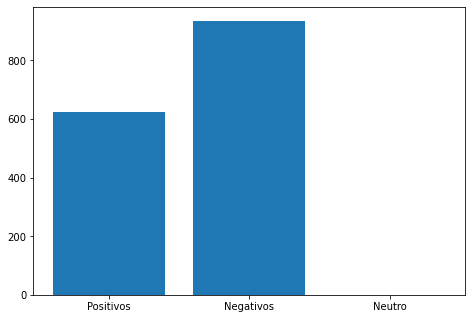

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positivos', 'Negativos', 'Neutro']
students = [len(dataOut[dataOut['etiqueta'] == 'positivo']),len(dataOut[dataOut['etiqueta'] == 'negativo']), len(dataOut[dataOut['etiqueta'] == 'neutro'])]
ax.bar(langs,students)
plt.show()

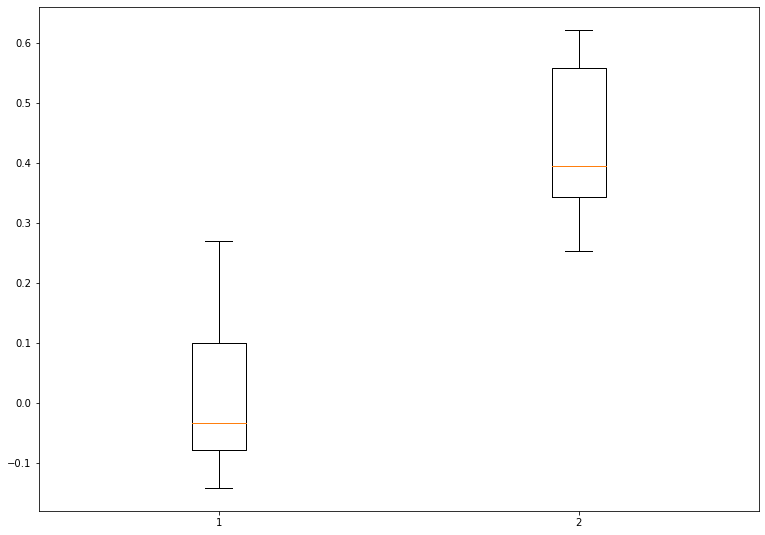

In [63]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot([dataOut['polaridad'], dataOut['subje']]) 
plt.show() 